**Análisis Exploratorio de Datos**

Mostramos la distribución de impagos, se observa que el numero total de impagos supone un porcentaje muy pequeño. Mostramos también la distribución de impagos por tipo de vehículo donde se observa que los impagos por tipo de vehículo están equilibrados.
Tendremos que utilizar técnicas de oversampling o undersampling para el entrenamiento correcto de los modelos.

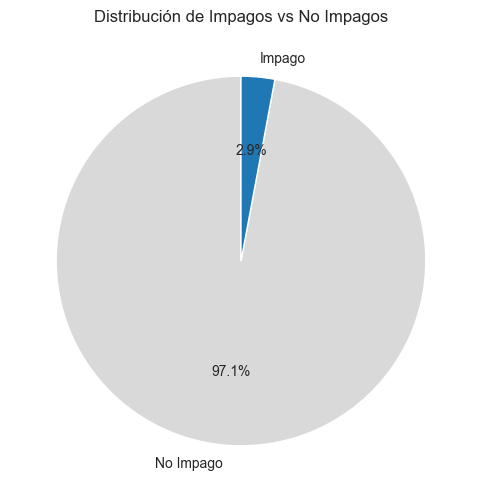

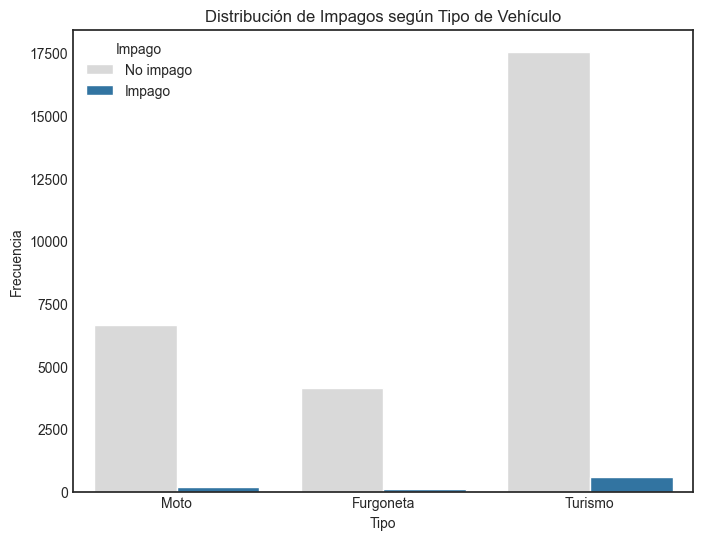

In [1]:
import pandas as pd

from src.data_utils.data_utils import read_data
import matplotlib.pyplot as plt
import seaborn as sns

excel_file_path = "D:\\develop\\predict_lapse\\data\\BBDD_Impago_1.0.xlsx"

df = read_data(excel_file_path)

plt.style.use('seaborn-v0_8-white')

# Mostramos el gráfico para el total de impagos
impagos_count = df['Impago'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(impagos_count, labels=['No Impago', 'Impago'], autopct='%1.1f%%', startangle=90, colors=['#D9D9D9', '#1F78B4'])
plt.title('Distribución de Impagos vs No Impagos')
plt.show()


# Mostramos el gráfico para el total de impagos por tipo de vehiculo
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Tipo', hue='Impago', palette={0: '#D9D9D9', 1: '#1F78B4'})
plt.xlabel('Tipo')
plt.ylabel('Frecuencia')
plt.title('Distribución de Impagos según Tipo de Vehículo')
plt.legend(title='Impago', labels=['No impago', 'Impago'], loc='upper left')
plt.show()


Mostramos diagramas de caja para las variables numéricas

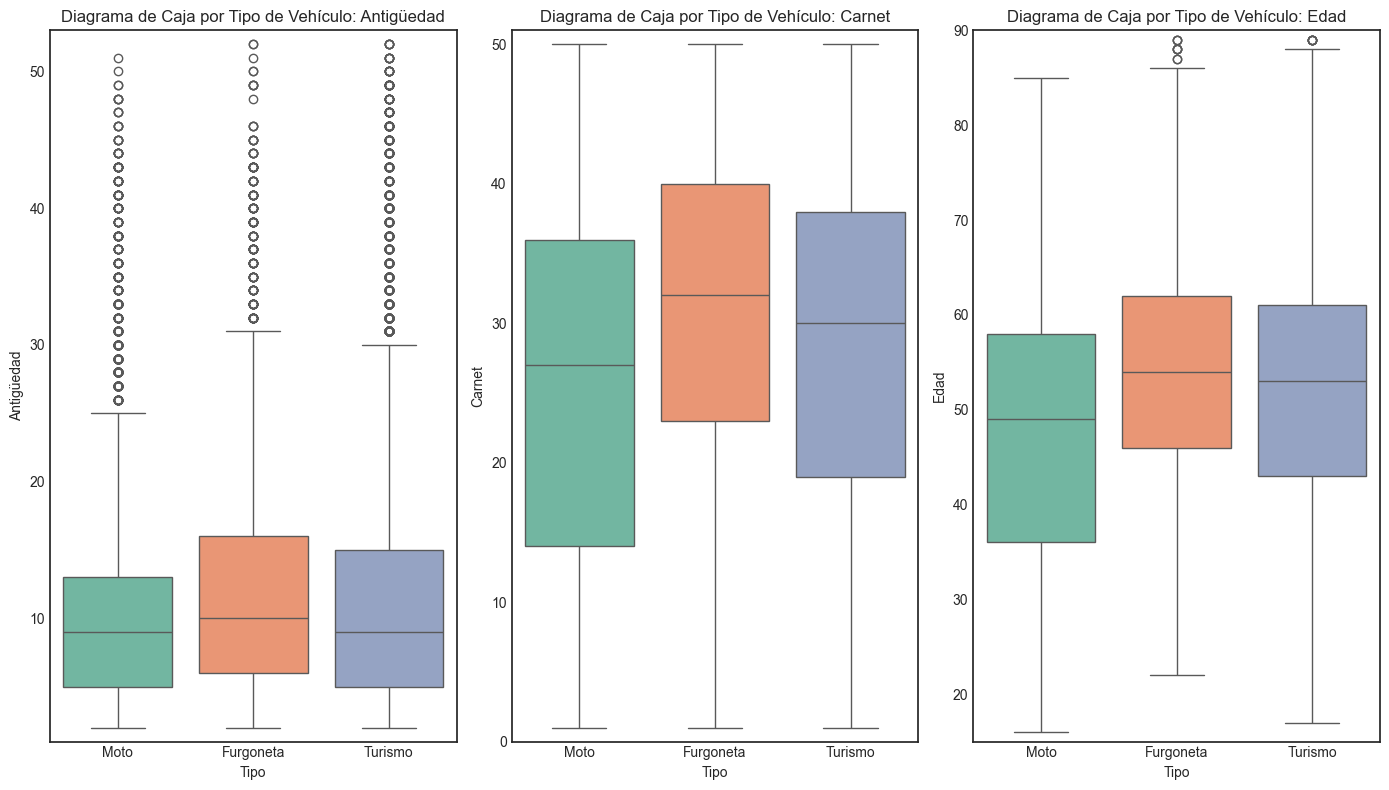

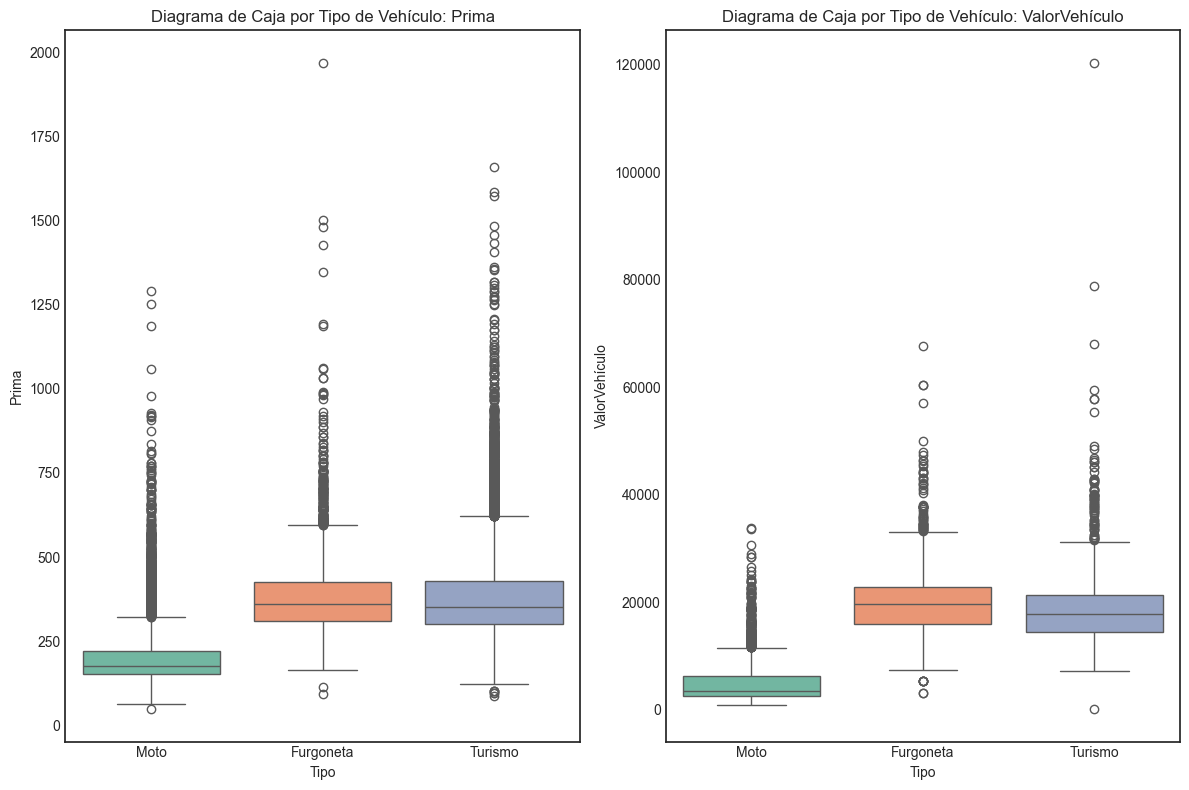

Realizamos el gráfico de caja con escala logarítmica para las variables de tipo monetario


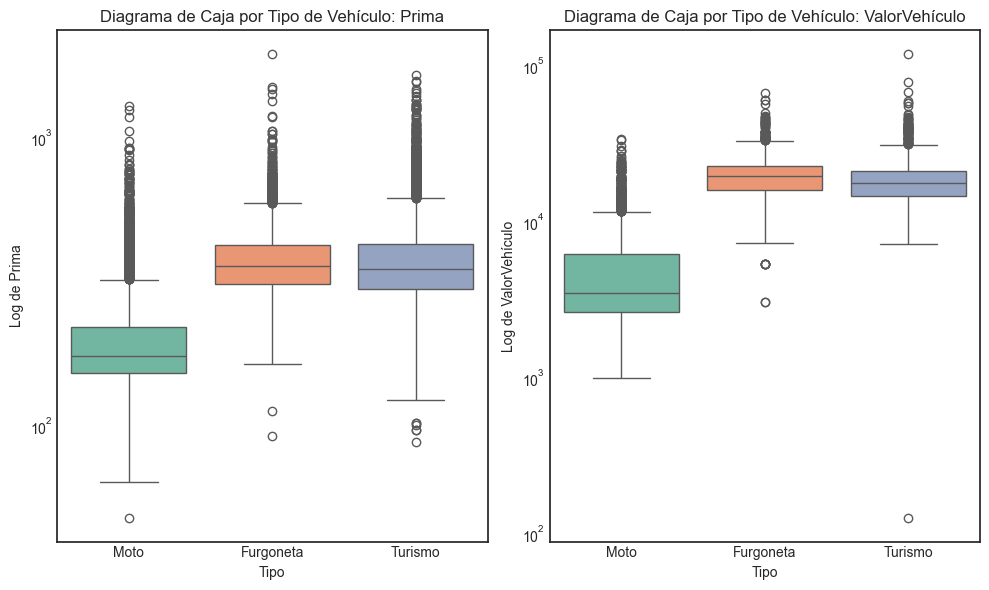

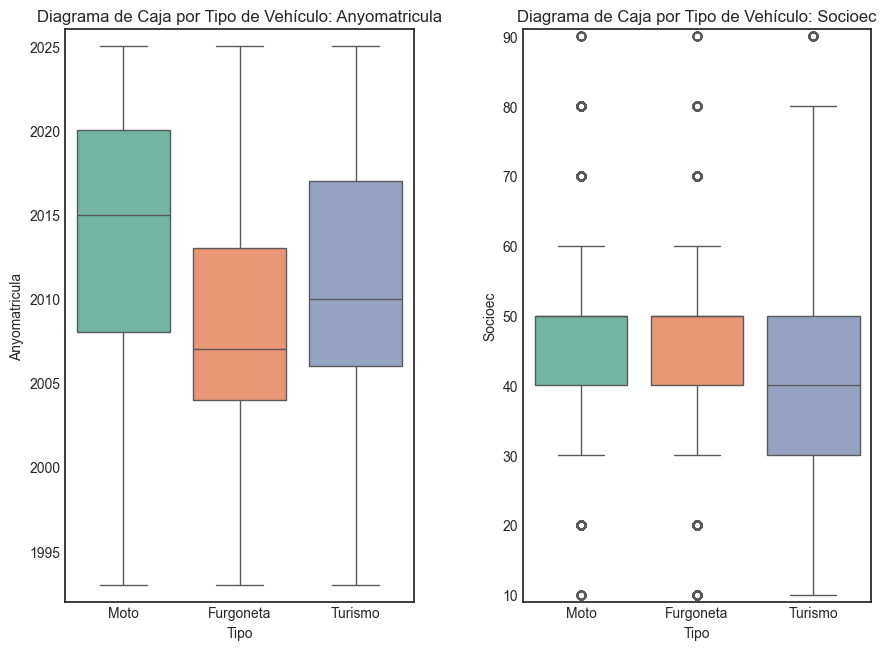

Describimos la variable "Socioec" 0        30
1        30
2        40
3        30
4        30
         ..
29216    50
29217    50
29218    30
29219    40
29220    50
Name: Socioec, Length: 29221, dtype: int64
Socioec
50    9269
40    7248
30    4952
60    3744
20    1659
70    1032
10     669
80     508
90     140
Name: count, dtype: int64


In [3]:

#num_vars = ['Anyomatricula', 'Prima', 'ValorVehículo', 'Socioec', 'Antigüedad', 'Carnet', 'Edad']

age_vars = ['Antigüedad', 'Carnet', 'Edad']

mon_vars = ['Prima', 'ValorVehículo']

other_vars = ['Anyomatricula', 'Socioec']


# Crear una figura con subgráficos (uno por cada variable numérica)
plt.figure(figsize=(14, 8))
plt.tight_layout(pad=4.0)
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# Crear un diagrama de caja para cada variable, agrupado por tipo de vehículo
for i, var in enumerate(age_vars, 1):
    plt.subplot(1, 3, i)  # 2 filas y 3 columnas de subgráficos
    sns.boxplot(data=df, x='Tipo',y=var, hue='Tipo', palette='Set2', showfliers=True)
    plt.title(f'Diagrama de Caja por Tipo de Vehículo: {var}')
    plt.ylabel(f'{var}')  # Etiqueta del eje Y
    plt.ylim(df[var].min() - 1, df[var].max() + 1)

# Ajustar el diseño para que no se solapen
plt.tight_layout()

# Mostrar los gráficos
plt.show()
plt.figure(figsize=(12, 8))

# Crear una figura con subgráficos (uno por cada variable numérica)

# Crear un diagrama de caja para cada variable, agrupado por tipo de vehículo
for i, var in enumerate(mon_vars, 1):
    plt.subplot(1, 2, i)
    sns.boxplot(data=df, x='Tipo',y=var, hue='Tipo', palette='Set2', showfliers=True)
    plt.title(f'Diagrama de Caja por Tipo de Vehículo: {var}')

# Ajustar el diseño para que no se solapen
plt.tight_layout()

# Mostrar los gráficos
plt.show()

print("Realizamos el gráfico de caja con escala logarítmica para las variables de tipo monetario")
plt.figure(figsize=(10, 6))

for i, var in enumerate(mon_vars, 1):
    plt.subplot(1, 2, i)
    sns.boxplot(data=df, x='Tipo',y=var, hue='Tipo', palette='Set2', showfliers=True)
    plt.title(f'Diagrama de Caja por Tipo de Vehículo: {var}')
    plt.yscale('log')
    plt.ylabel(f'Log de {var}')

# Ajustar el diseño para que no se solapen
plt.tight_layout()

# Mostrar los gráficos
plt.show()


plt.figure(figsize=(10, 8))

# Crear un diagrama de caja para cada variable, agrupado por tipo de vehículo
for i, var in enumerate(other_vars, 1):
    plt.subplot(1, 2, i)
    sns.boxplot(data=df, x='Tipo',y=var, hue='Tipo', palette='Set2', showfliers=True)
    plt.title(f'Diagrama de Caja por Tipo de Vehículo: {var}')
    plt.ylabel(f'{var}')  # Etiqueta del eje Y
    plt.ylim(df[var].min() - 1, df[var].max() + 1)

# Ajustar el diseño para que no se solapen
plt.tight_layout(pad=5.0)
plt.subplots_adjust(top=0.85)
# Mostrar los gráficos
plt.show()

print("Describimos la variable \"Socioec\"", df['Socioec'])
print(df['Socioec'].value_counts())

**Correlación variables numéricas**

Observamos que existe una fuerte correlación entre Edad y Carnet
También se muestra una leve correlación entre la variable Socioec y las variables Edad y Carnet


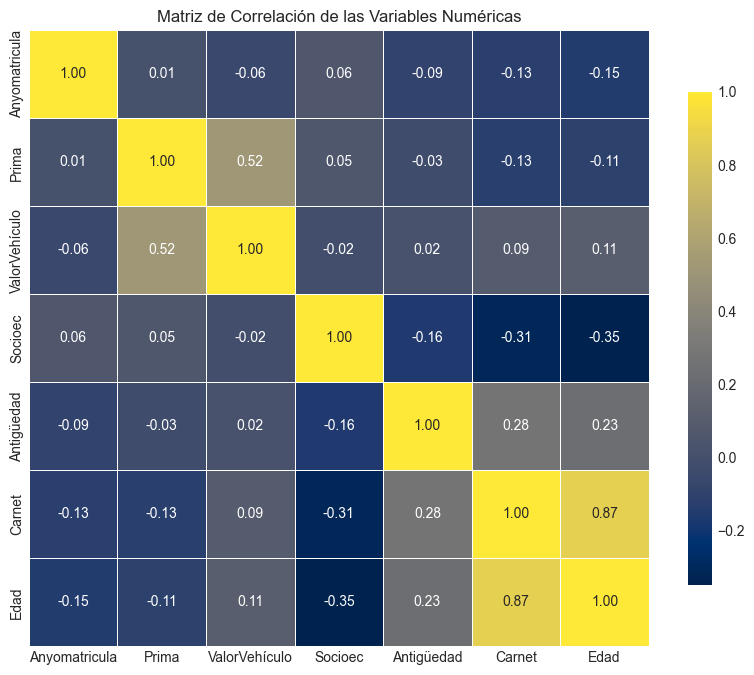

In [5]:
num_vars = ['Anyomatricula', 'Prima', 'ValorVehículo', 'Socioec', 'Antigüedad', 'Carnet', 'Edad']

corr_matrix = df[num_vars].corr()
plt.figure(figsize=(10, 8))  # Ajusta el tamaño de la figura
sns.heatmap(corr_matrix, annot=True, cmap='cividis', fmt='.2f', linewidths=0.5, cbar_kws={"shrink": 0.8})

# Añadir el título
plt.title('Matriz de Correlación de las Variables Numéricas')

# Mostrar el gráfico
plt.show()

**Realizamos análisis univariante**


In [6]:
import scipy.stats as stats
import pandas as pd

spearman_results = {}

for var in num_vars:
    corr_spearman, p_value = stats.spearmanr(df[var], df['Impago'])  # Calcula el coeficiente de Spearman
    spearman_results[var] = corr_spearman  # Guardar el resultado

# Mostrar los resultados
for var, corr in spearman_results.items():
    print(f'Coeficiente de Spearman entre {var} y la variable objetivo: {corr}')


df_results = pd.DataFrame({
    'Spearman_Correlation': spearman_results
})

print(f"\n\n{df_results}")

Coeficiente de Spearman entre Anyomatricula y la variable objetivo: -0.018041773423411813
Coeficiente de Spearman entre Prima y la variable objetivo: 0.060824438605545116
Coeficiente de Spearman entre ValorVehículo y la variable objetivo: 0.06085015816497113
Coeficiente de Spearman entre Socioec y la variable objetivo: 0.03912393634497859
Coeficiente de Spearman entre Antigüedad y la variable objetivo: -0.17273365027080262
Coeficiente de Spearman entre Carnet y la variable objetivo: -0.02592808918474787
Coeficiente de Spearman entre Edad y la variable objetivo: -0.011241288047042147


               Spearman_Correlation
Anyomatricula             -0.018042
Prima                      0.060824
ValorVehículo              0.060850
Socioec                    0.039124
Antigüedad                -0.172734
Carnet                    -0.025928
Edad                      -0.011241


Como podemos observar existe muy poca correlación entre las variables numéricas y la variable objetivo, solamente la variable Antigüedad parece indiciar una relación leve, donde muestra que los asegurados con mayor permanencia en el seguro tienen menos probabilidad de impago.

**Análisis variables categóricas**



In [7]:
from src.data_utils.data_utils import prepare_dummy_cols
from src.analysis.statistic_analysis import cramers_v
from scipy.stats import chi2_contingency

# cat_vars = ['Canal', 'Domiciliacion', 'Figuras', 'Motor', 'Pago', 'SegundoConductor', 'Tipo_Furgoneta', 'Tipo_Moto', 'Tipo_Turismo', 'Valor', 'Zonas_Zona1', 'Zonas_Zona2', 'Zonas_Zona3', 'Zonas_Zona4', 'Zonas_Zona5', 'Zonas_Zona6', 'Zonas_Zona7', 'Zonas_Zona8']

cat_vars = ['Pago', 'Domiciliacion', 'Anyomatricula', 'Prima', 'Valor',
       'ValorVehículo', 'Motor', 'Canal', 'Antigüedad', 'Edad', 'Carnet',
       'SegundoConductor', 'Figuras', 'Tipo_Furgoneta', 'Tipo_Moto',
       'Tipo_Turismo', 'Zonas_Zona1', 'Zonas_Zona2', 'Zonas_Zona3',
       'Zonas_Zona4', 'Zonas_Zona5', 'Zonas_Zona6', 'Zonas_Zona7',
       'Zonas_Zona8', 'Socioec_10', 'Socioec_20', 'Socioec_30', 'Socioec_40',
       'Socioec_50', 'Socioec_60', 'Socioec_70', 'Socioec_80', 'Socioec_90']

df_dummy = prepare_dummy_cols(df, ['Tipo', 'Zonas', 'Socioec'])
print(df_dummy.head())
print(df_dummy.columns)

chi2_results = {}
cramers_v_results = {}

target = 'Impago'
# Calcular Chi-cuadrado y Cramér's V para cada par de variables categóricas
for var in cat_vars:

    contingency_table = pd.crosstab(df_dummy[var], df[target])

    # Calcular el test de Chi-cuadrado
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Calcular Cramér's V
    n = contingency_table.sum().sum()  # Número total de muestras
    k = len(contingency_table.columns)  # Número de categorías en la segunda variable
    r = len(contingency_table.index)  # Número de categorías en la primera variable
    v = cramers_v(chi2, n, k, r)

    # Guardar los resultados
    chi2_results[var] = chi2
    cramers_v_results[var] = v

# Mostrar los resultados

# print(df_dummy[cat_vars].head())
#
# print("Resultados de Chi-cuadrado:")
# for pair, chi2_value in chi2_results.items():
#     print(f'{pair}: {chi2_value}')
#
# print("\nResultados de Cramér\'s V:")
# for pair, v_value in cramers_v_results.items():
#     print(f'{pair}: {v_value}')

df_results = pd.DataFrame({
    'Chi-cuadrado': chi2_results,
    'Cramér\'s V': cramers_v_results
})

# Mostrar la tabla
print(df_results)

   Pago  Domiciliacion  Anyomatricula   Prima  Valor  ValorVehículo  Motor  \
0     1              1           2003  176.94      2         3125.0      1   
1     1              0           2002  230.02      6         3625.0      1   
2     1              1           2021  429.23      3         2565.0      1   
3     1              1           2019  411.13      7         2505.0      1   
4     1              0           2020  232.48      3         2505.0      1   

   Canal  Antigüedad  Edad  ...  Zonas_Zona8  Socioec_10  Socioec_20  \
0      0          10    80  ...        False       False       False   
1      1           8    22  ...        False       False       False   
2      0           2    20  ...        False       False       False   
3      1           2    23  ...        False       False       False   
4      0           4    25  ...        False       False       False   

   Socioec_30  Socioec_40  Socioec_50  Socioec_60  Socioec_70  Socioec_80  \
0        True       F

Según estos valores:
* Variables con alto Chi-cuadrado y moderada relación: Canal, Valor, Zonas_Zona1, Zonas_Zona5.
* Variables con bajo Chi-cuadrado y relación débil: Domiciliacion, Figuras, Zonas_Zona8.
* Variables con relación moderada: Motor, Pago, SegundoConductor, Tipo_Furgoneta, Tipo_Moto.
* La variable 'Socioec' la hemos analizado como variable categórica, sin embargo no se observa que esta configuración para los datos de la variable nos proporcione más información, decidimos tratar la variable como numérica ya que asumimos una ordinalidad en esteos datos. Observamos en los gráficos de caja, que esta variable se distribuye como una campana de Gauss. Este representa perfectamente el reparto de riqueza de la población del universo de datos.

En general no se observa ninguna variable que especificamente defina el impago de forma individual, Observamos variables como Figuras y domiciliación que parecen no tener mucha importancia. De momento no las eliminamos. Posteriormente estaremos atentos al resultado de Boruta para seleccion de variables.

Al tener un número muy reducido de elementos de Impago procederemos a realizar técnicas de oversample y analizar cómo funcionan en el entrenamiento, en los gráficos de Componentes Principales observamos como estos datos se encuentran dispersos sin al parecer un patrón claro, utilizaremos técnicas que permitan aumentar las muestras de Impagos mediante técnicas de vecinos más cercanos.

**Analizamos los Componentes Principales**
Realizamos análisis PCA y t-sne
Realizamos los gráficos para los dos y tres Componentes Principales

Components analysis           Pago  Domiciliacion  Anyomatricula     Prima     Valor  \
PCA1 -0.003587       0.003728       0.050499  0.008869  0.987031   
PCA2 -0.107426       0.029366      -0.111657  0.609091  0.038716   

      ValorVehículo     Motor     Canal   Socioec  Antigüedad  ...  Tipo_Moto  \
PCA1      -0.040774 -0.016662 -0.060357  0.025831   -0.086270  ...   0.019961   
PCA2       0.660806  0.213778 -0.001888  0.004911    0.001074  ...  -0.264386   

      Tipo_Turismo  Zonas_Zona1  Zonas_Zona2  Zonas_Zona3  Zonas_Zona4  \
PCA1     -0.005393    -0.020819     0.059256    -0.045755    -0.006854   
PCA2      0.204585    -0.000384    -0.008651    -0.012084    -0.000071   

      Zonas_Zona5  Zonas_Zona6  Zonas_Zona7  Zonas_Zona8  
PCA1     0.016554     0.000098     0.000479    -0.002959  
PCA2     0.021332    -0.000042    -0.000839     0.000738  

[2 rows x 24 columns]
Explained variance ratio for first two components:  [0.34119194 0.14441549]
Sum of explained variance ratio 

D:\develop\predict_lapse\src\data_utils\data_utils.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_scaled[num_vars] = scaler.fit_transform(df[num_vars])


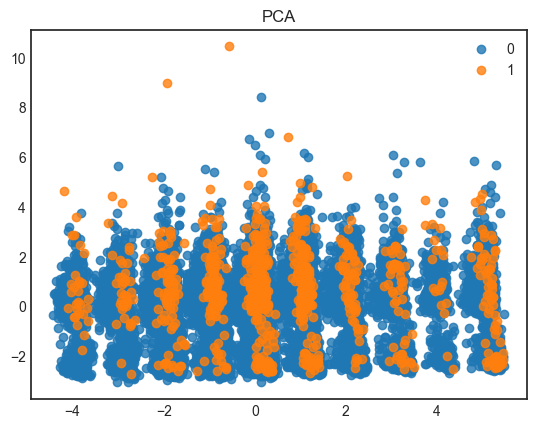

In [8]:
from src.model_utils.dim_reduction import pca_2d, tsne_2d, tsne_3d
from src.data_utils.data_utils import normalize_num_vars

feature_cols = ['Pago', 'Domiciliacion', 'Anyomatricula', 'Prima', 'Valor',
                'ValorVehículo', 'Motor', 'Canal', 'Socioec', 'Antigüedad', 'Carnet',
                'SegundoConductor', 'Figuras', 'Tipo_Furgoneta',
                'Tipo_Moto', 'Tipo_Turismo', 'Zonas_Zona1', 'Zonas_Zona2',
                'Zonas_Zona3', 'Zonas_Zona4', 'Zonas_Zona5', 'Zonas_Zona6',
                'Zonas_Zona7', 'Zonas_Zona8']


num_vars = ['Anyomatricula', 'Prima', 'ValorVehículo', 'Socioec','Antigüedad', 'Carnet']

df_dummy = prepare_dummy_cols(df, ['Tipo', 'Zonas'])
X_scaled = normalize_num_vars(df_dummy[feature_cols], num_vars)
y = df['Impago']

pca_2d(X_scaled, y)



Observamos que se distribuyen de esta forma el gráfico de PCA de los dos Componentes Principales debido a las variables dummy utilizadas.

Mostramos el gráficos de t-SNE para dos Componentes Principales
TSNE            TSNE1      TSNE2
0     -36.153431 -69.307709
1      12.067337 -50.668510
2     -19.357166 -55.390018
3      27.525507 -44.248932
4     -23.820190 -55.774162
...          ...        ...
29216  -3.548798  78.618217
29217   0.085767  77.389153
29218  51.962055  54.276264
29219  -3.746566  78.806541
29220  -3.860804  78.826553

[29221 rows x 2 columns]


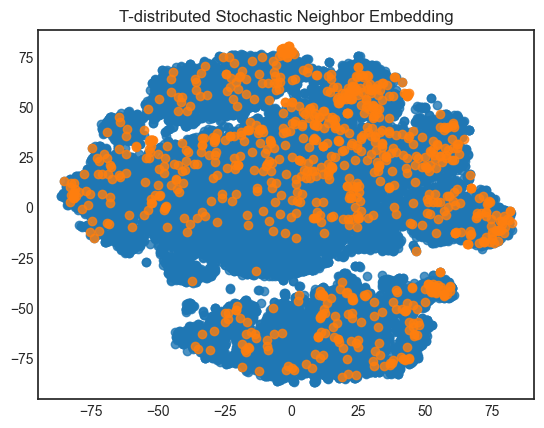

In [9]:
print("Mostramos el gráficos de t-SNE para dos Componentes Principales")

tsne_2d(X_scaled, y)


Mostramos el gráficos de t-SNE para tres Componentes Principales
TSNE            TSNE1      TSNE2      TSNE3
0     -19.229038 -15.280648  -3.996691
1       1.356861 -17.511248  -7.827921
2      -5.926744 -21.960234 -14.992971
3       9.530128 -17.914103 -11.838473
4     -10.527412 -20.673185 -12.794952
...          ...        ...        ...
29216  -8.035015  22.406258  13.704507
29217   7.649847   3.738053 -30.974791
29218  -7.627553  23.356901  14.610344
29219  -8.001289  22.791229  14.258155
29220  -8.285916  22.606833  14.321794

[29221 rows x 3 columns]


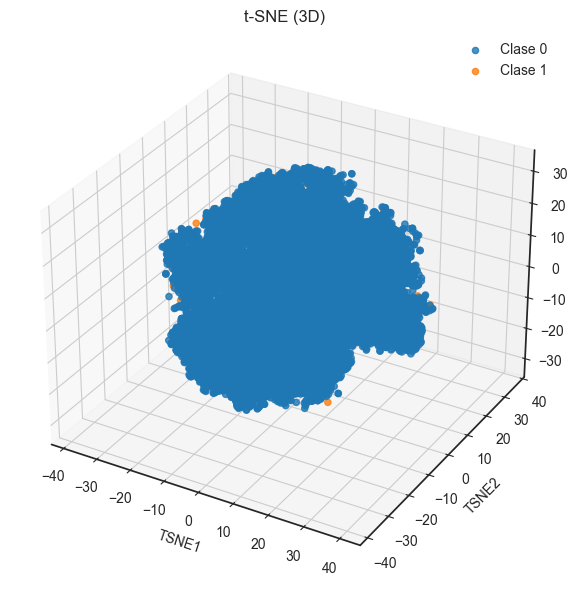

In [10]:
print("Mostramos el gráficos de t-SNE para tres Componentes Principales")

tsne_3d(X_scaled, y)

En general no se observa ninguna variable que especificamente defina el impago de forma individual, Observamos variables como Figuras y domiciliación que parecen no tener mucha importancia. De momento no las eliminamos. Posteriormente estaremos atentos al resultado de Boruta para seleccion de variables.

Al tener un número muy reducido de elementos de Impago procederemos a realizar técnicas de oversample y analizar cómo funcionan en el entrenamiento, en los gráficos de Componentes Principales observamos como estos datos se encuentran dispersos sin al parecer un patrón claro, utilizaremos técnicas que permitan aumentar las muestras de Impagos mediante técnicas de vecinos más cercanos.